# Movie Rating Prediction

## Exploratory Data Analysis

### Load the dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
import utils as util
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
movie_data=pd.read_csv("movie_metadata.csv")
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Features Description
* Total Predictors (27)

> **Quantitative Features** (15)
* **Descrete** (3)
    * num_voted_users
    * cast_total_facebook_likes
    * movie_facebook_likes
* **Continues** (12)
    * num_critic_for_reviews
    * duration
    * director_facebook_likes
    * actor_3_facebook_likes
    * actor_1_facebook_likes
    * gross
    * facenumber_in_poster
    * num_user_for_reviews
    * budget
    * title_year
    * actor_2_facebook_likes
    * aspect_ratio

> **Qualittive Features** (13)
* color
* director_name
* genres
* actor_1_name
* movie_title
* actor_2_name
* plot_keywords
* movie_imdb_link
* actor_3_name
* language
* country
* content_rating

#### Target Variable : imdb_score (continues feature)

### Identify Features with Missing Data

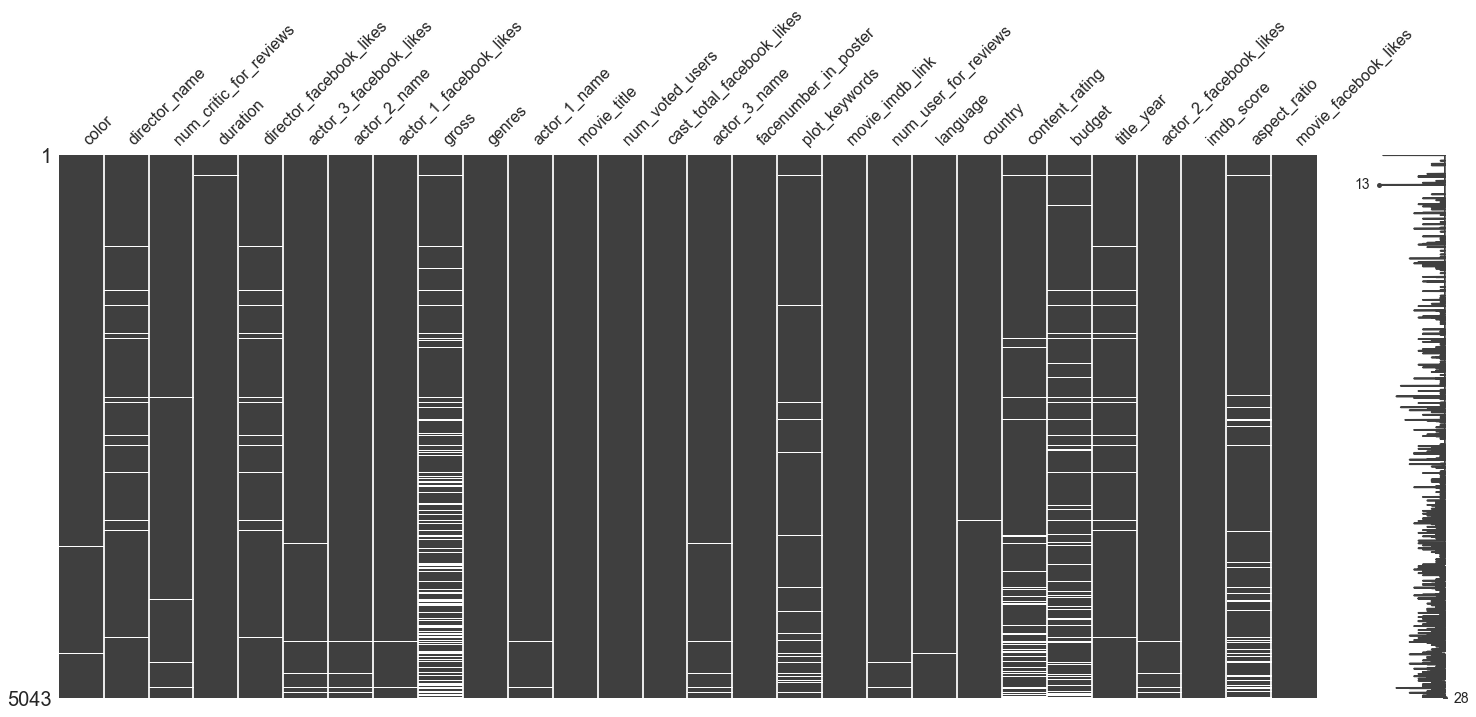

In [3]:
msno.matrix(movie_data)

### Nullity Correlation

* How strongly the presence or absence of one variable affects the presence of another.

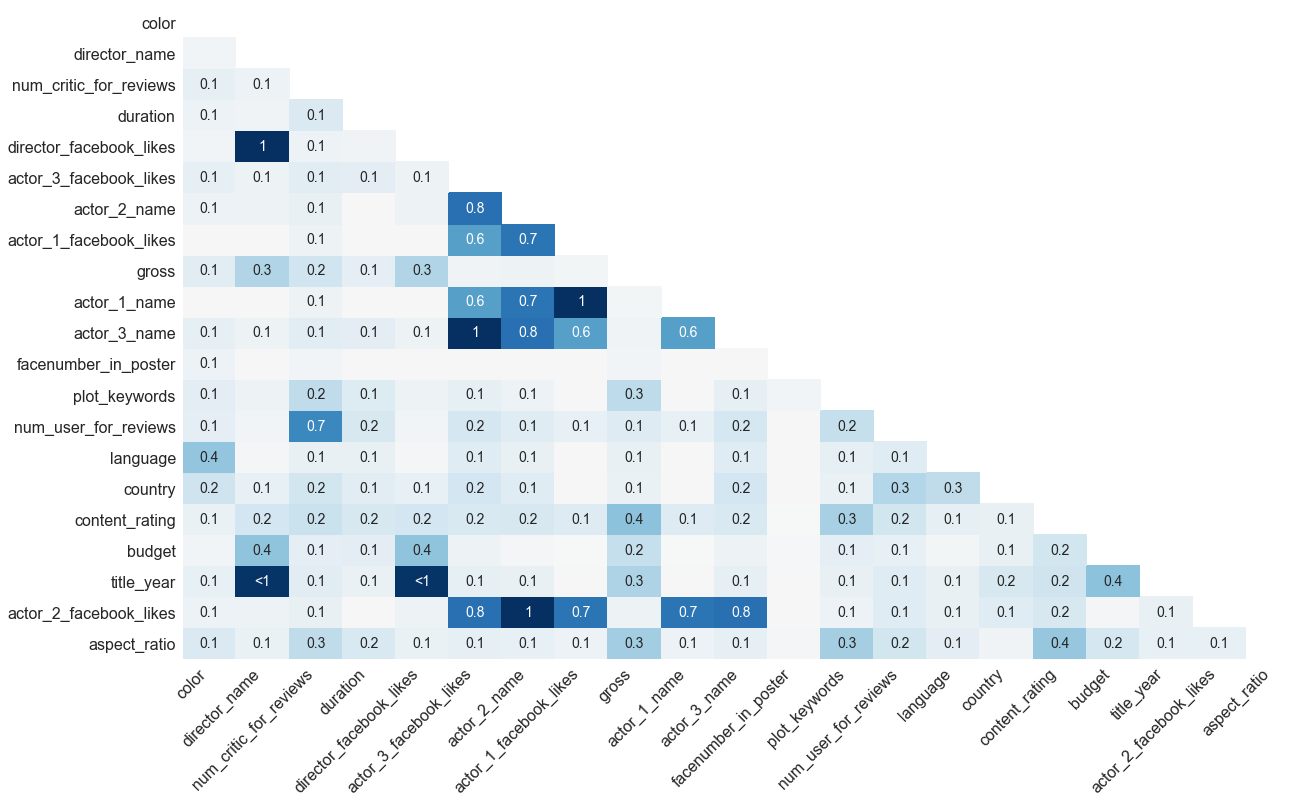

In [4]:
msno.heatmap(movie_data)

In [5]:
movie_data[util.show_missing_featues(movie_data)].isnull().sum()/movie_data.shape[0]*100

Dataset size:  5043
Features that are having missing data(%):


color                       0.376760
director_name               2.062265
num_critic_for_reviews      0.991473
duration                    0.297442
director_facebook_likes     2.062265
actor_3_facebook_likes      0.456078
actor_2_name                0.257783
actor_1_facebook_likes      0.138806
gross                      17.529248
actor_1_name                0.138806
actor_3_name                0.456078
facenumber_in_poster        0.257783
plot_keywords               3.033908
num_user_for_reviews        0.416419
language                    0.237954
country                     0.099147
content_rating              6.008328
budget                      9.756098
title_year                  2.141582
actor_2_facebook_likes      0.257783
aspect_ratio                6.523895
dtype: float64

### Imputation Strategy

* From the Nullity Correlation Heatmap we can say that there is correlation between the features with missing data > 5%.

#### Features with Missing Data > 5 % 
* Quantitative
    * gross - 17%
    * budget ~ 10%
    * aspect_ratio -6%
    * **Fill in missing data with medean of the feauture.**
    

* Qualitative
    * content_rating 6%
    * Since content_rating is a **categorical features we will have to employ analyse the missing behaviour in depth to come up with the imputation strategy.**
    * For now drop missing samples with content_rating

    


* **It is okay to drop the samples of the features with missing data < 5% as they are missing at ramdom**


### Descriptive Stats (before Imputation)

In [6]:
movie_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


### Univariate Analysis

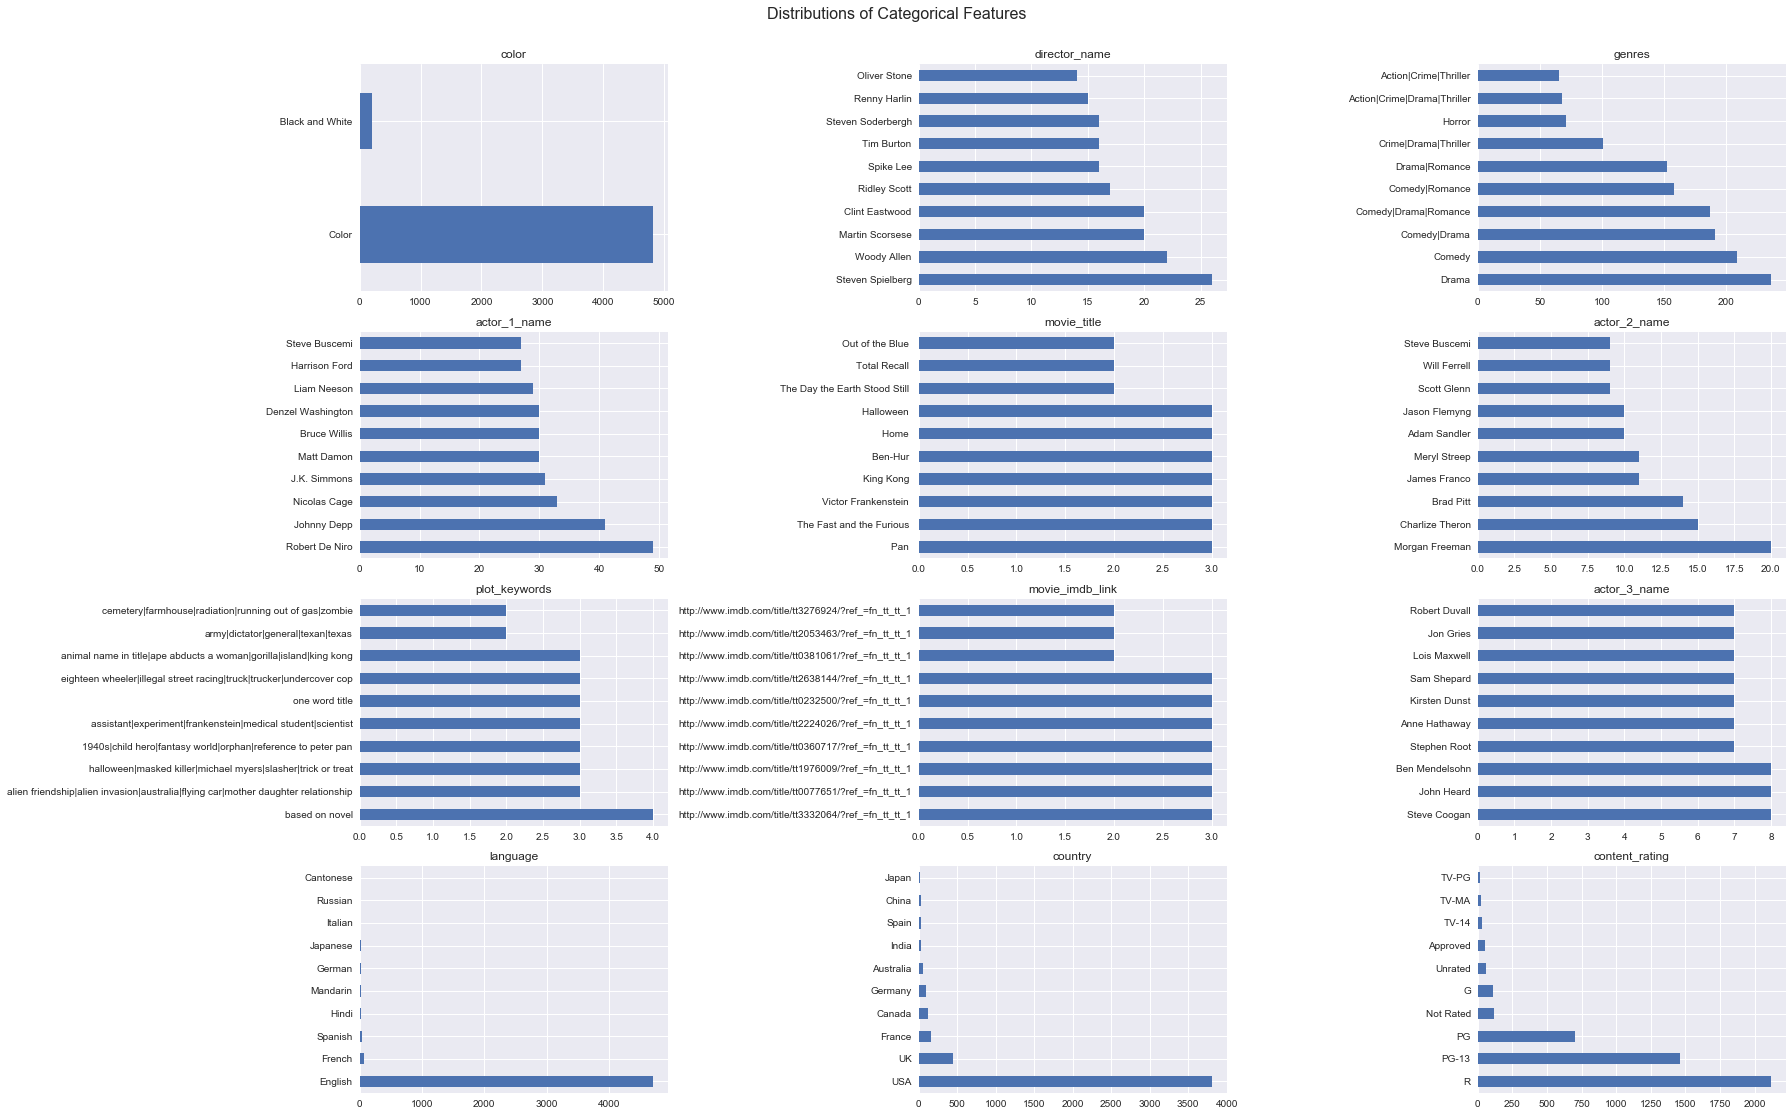

In [7]:
util.distribution(movie_data,'qual',transformed=False)

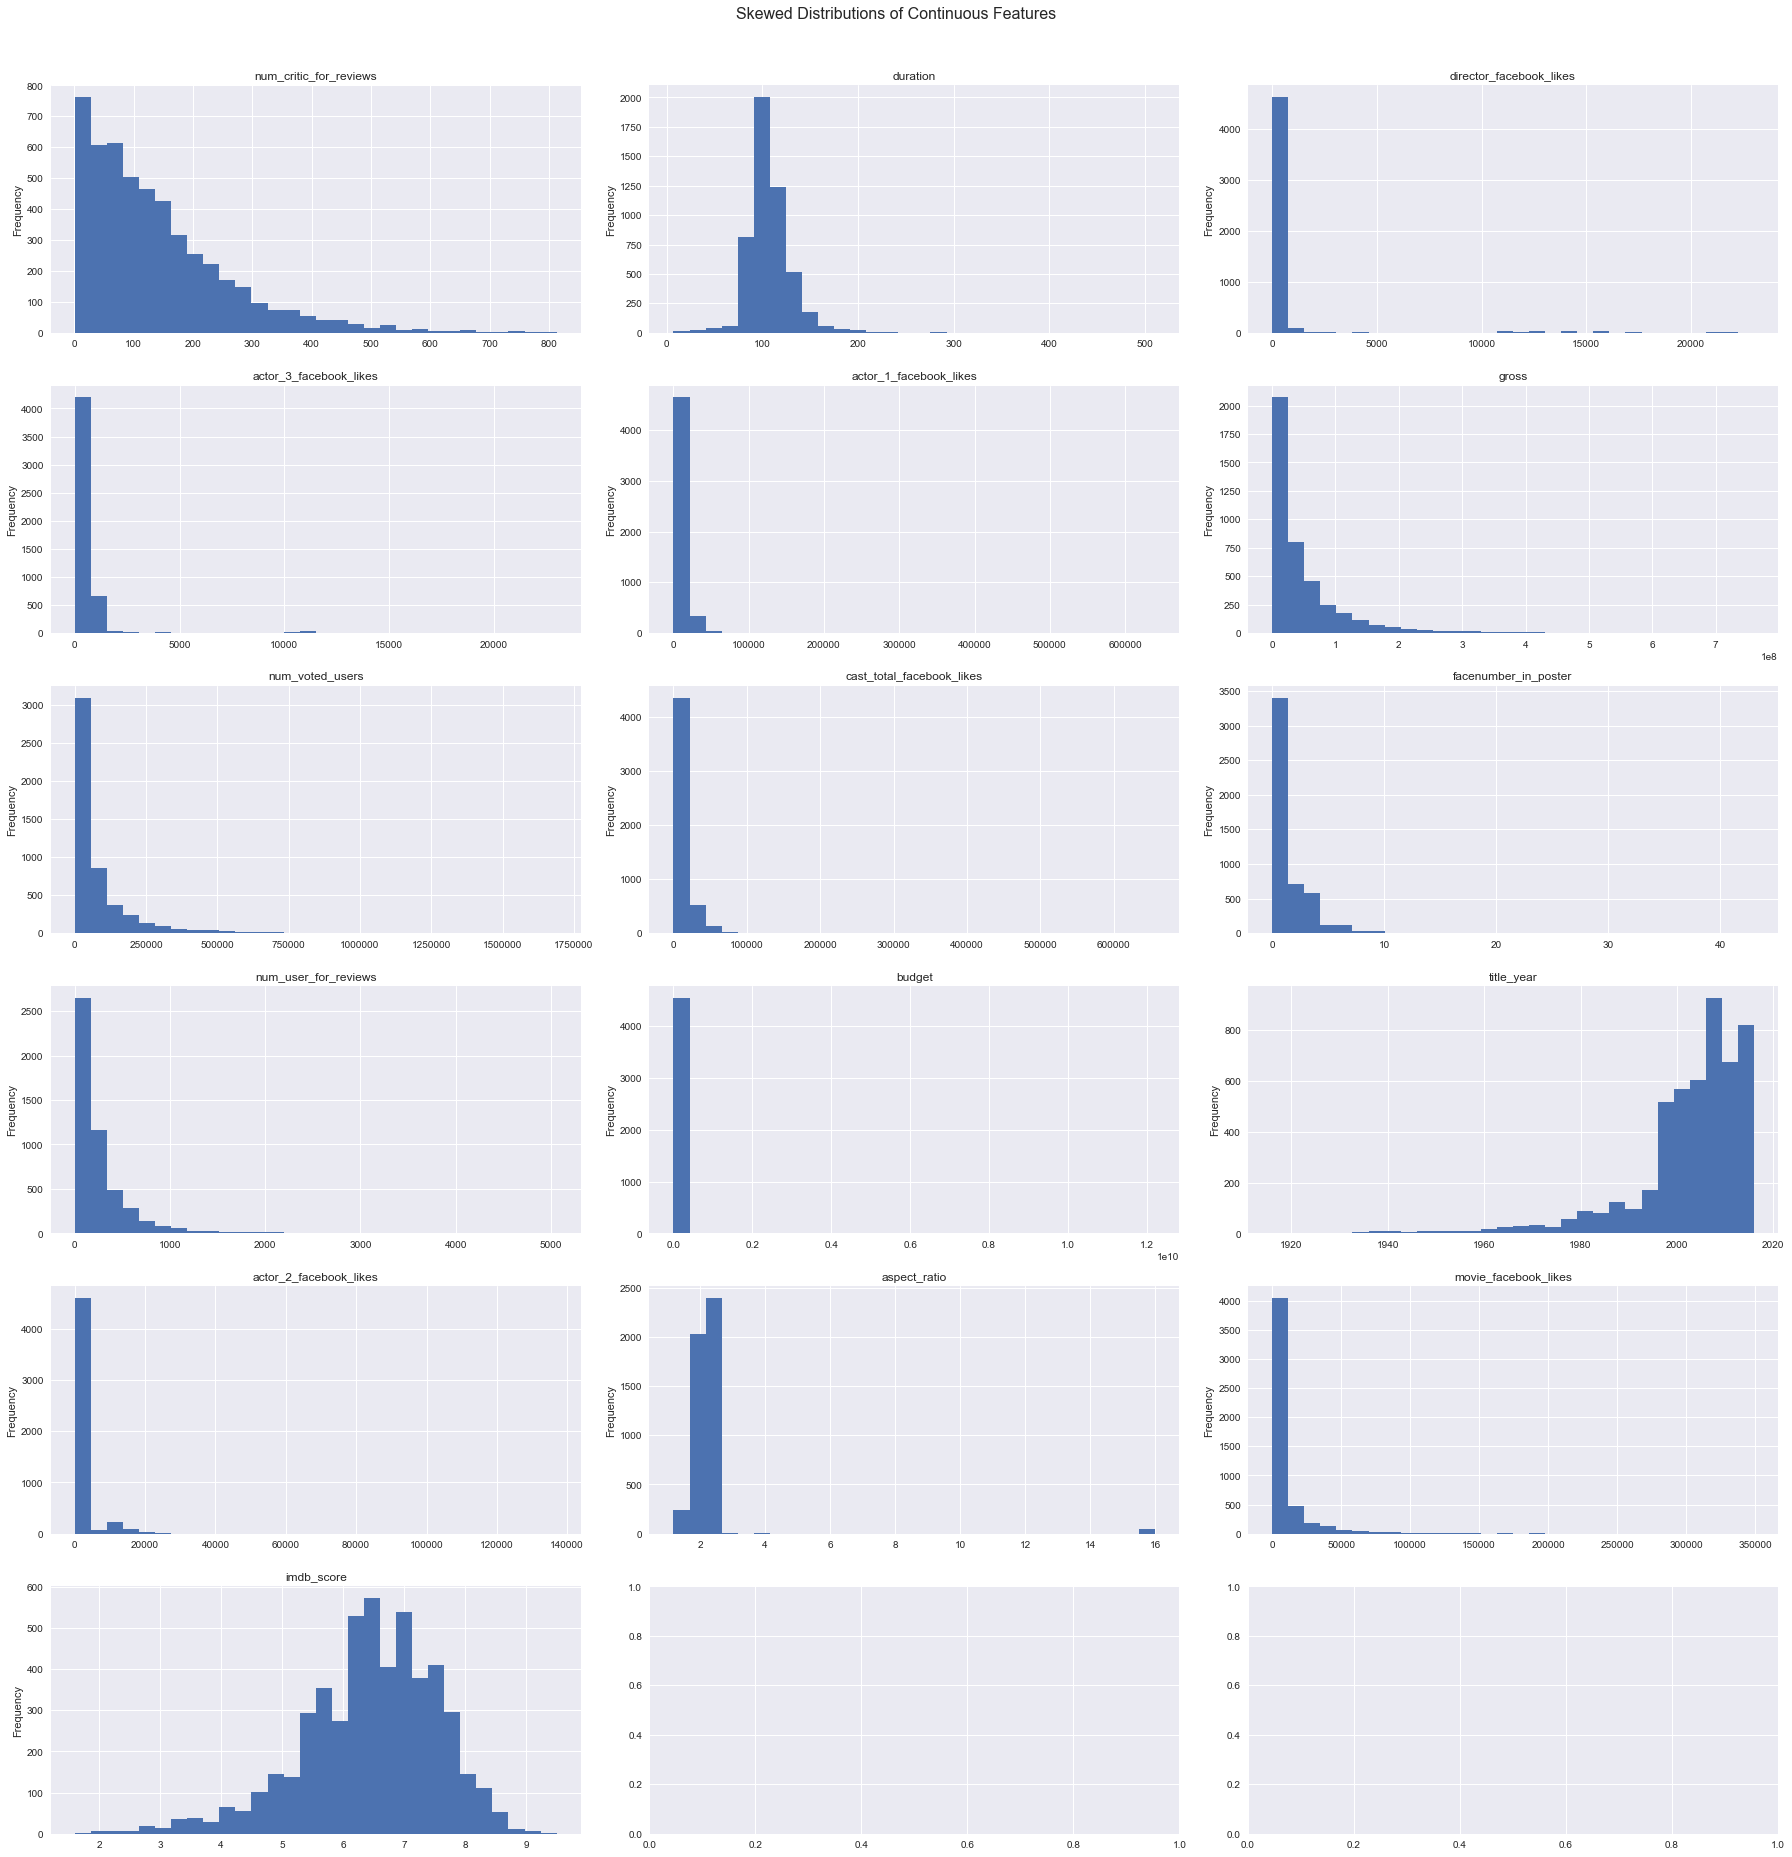

In [8]:
util.distribution(movie_data,'quant',transformed=False)

### Bivariate Analysis

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


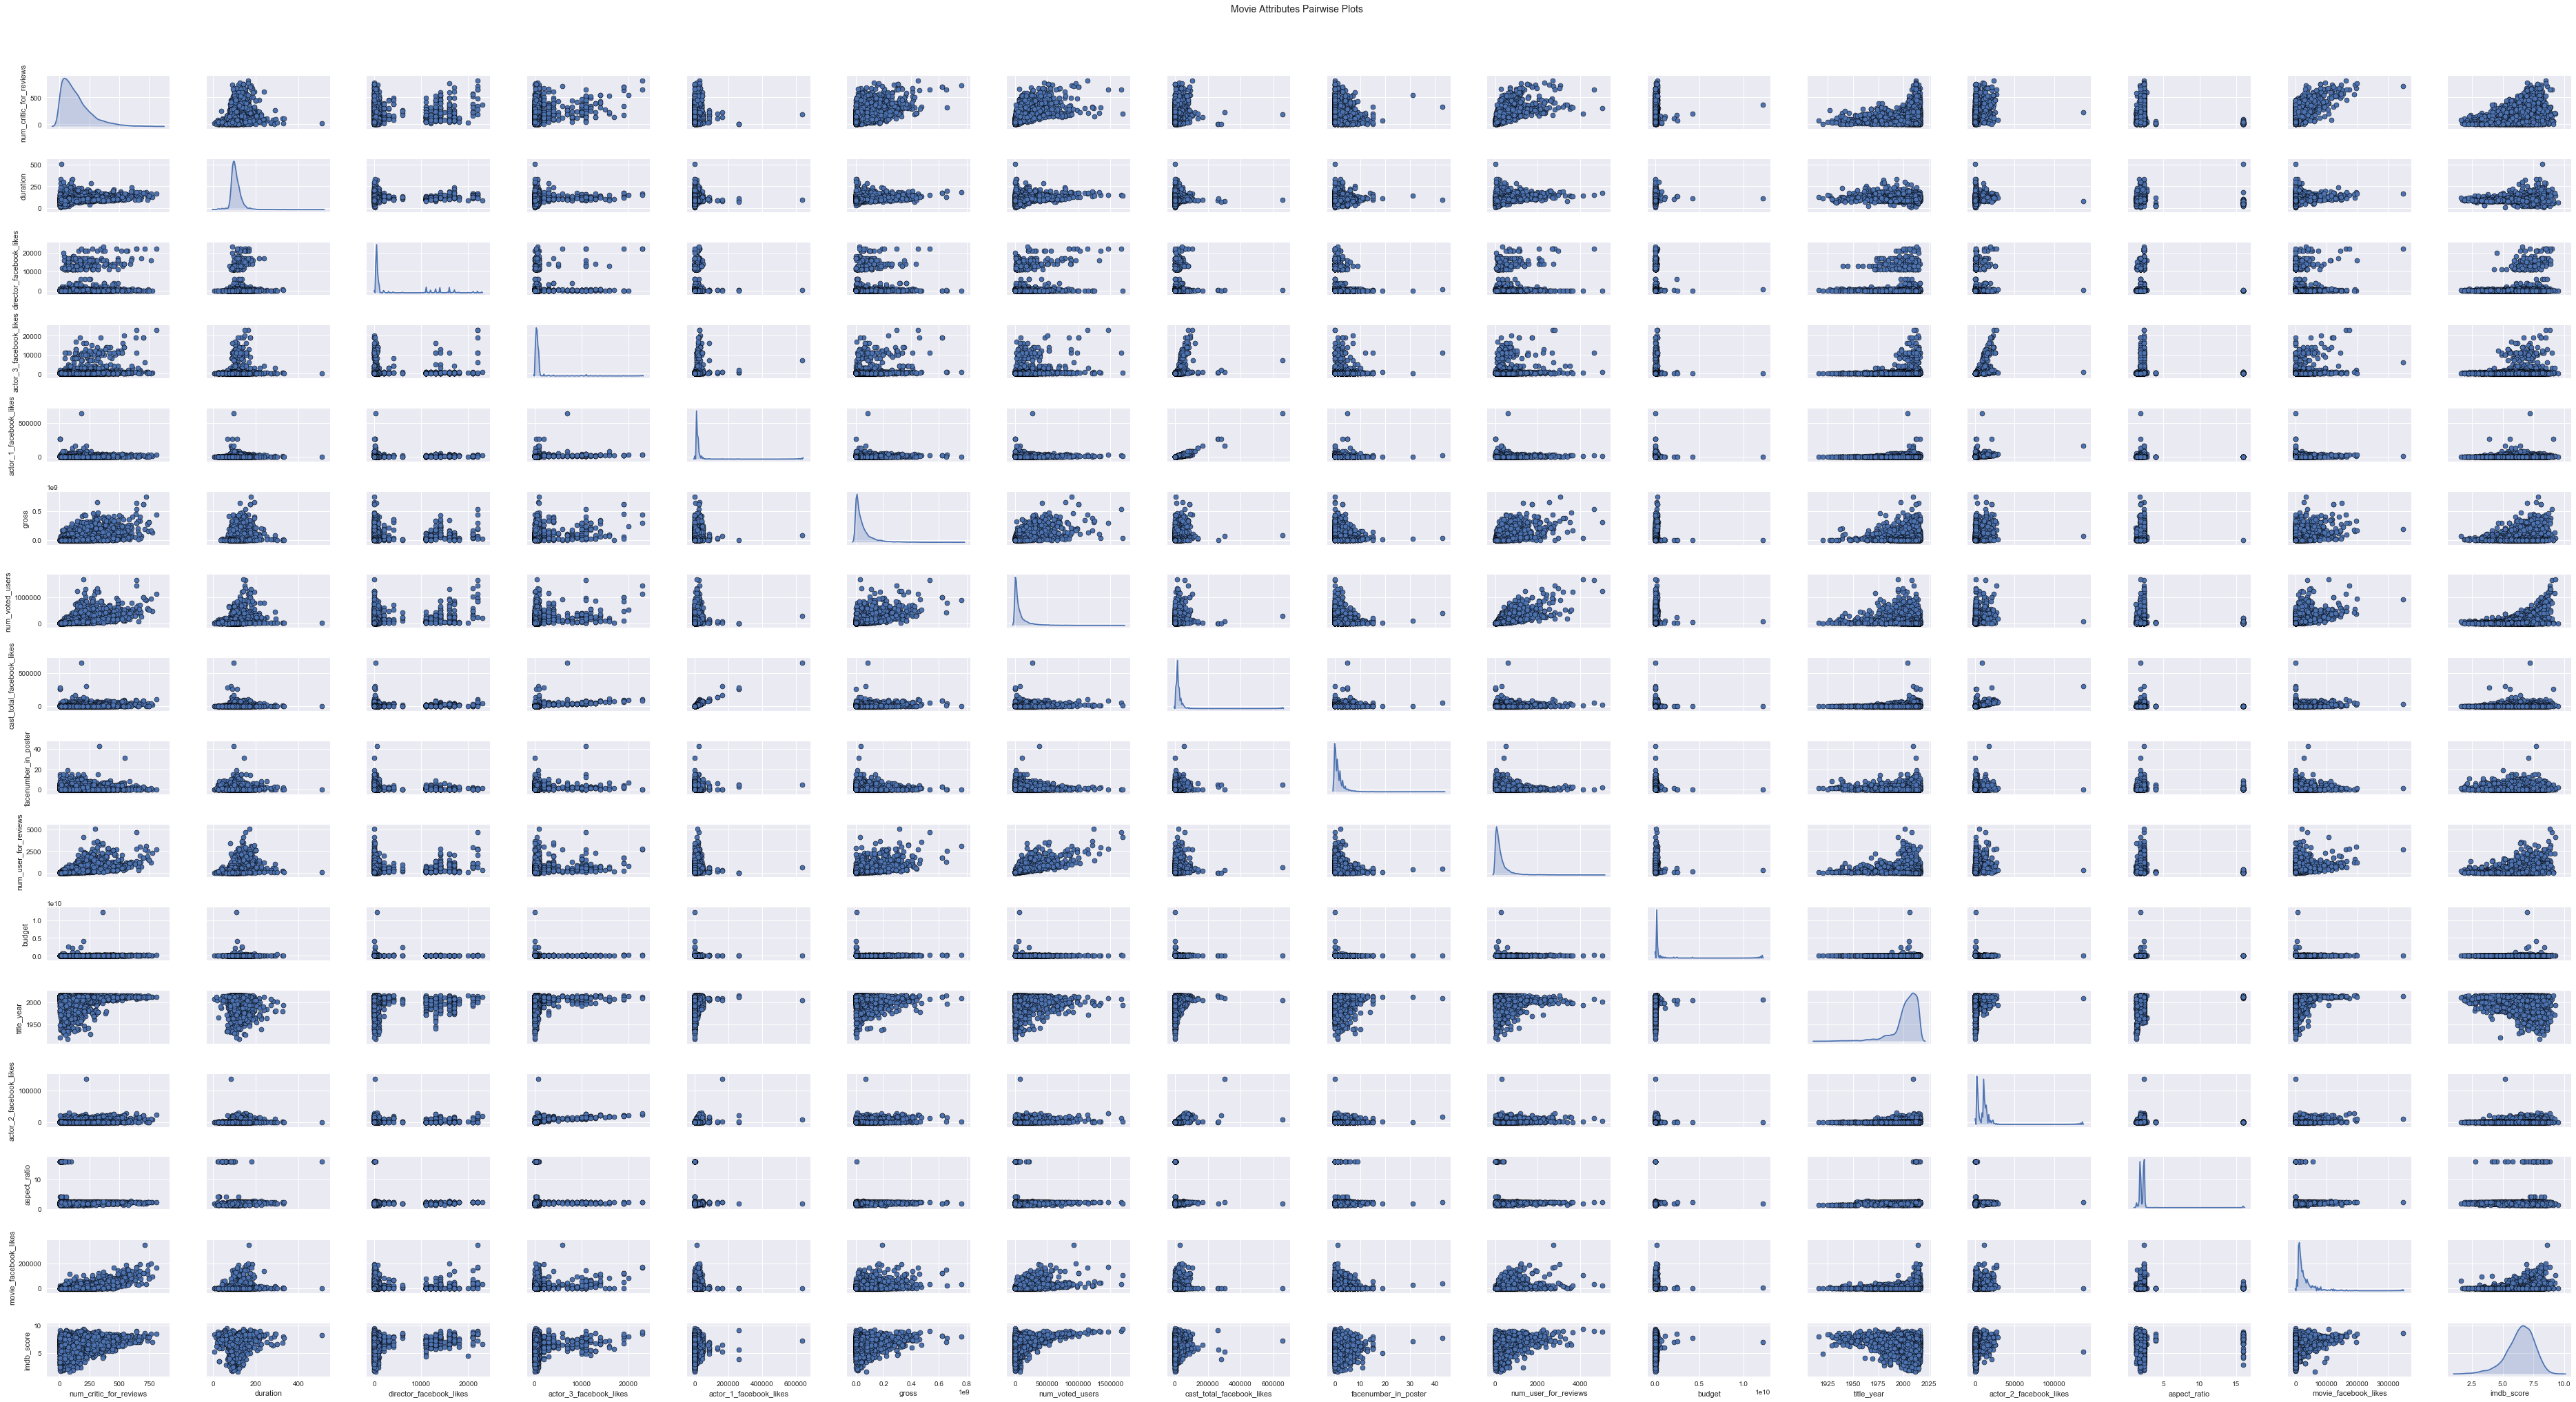

In [9]:
util.bivariate(movie_data)

## Bivariate Analysis Summary 

**Potential Predictors**

** Features exhibiting positve correlation with imdb_score:**

* movie_facebooK_likes
* num_user_for_reviews
* no_of_voted_user
* gross
* actro_3_facebook_likes
* direct_facebook_likes
* num_of_critics_for_review
* duration

**inverse correlation**
* title_year

## Data Preprocessing

### Data Imputation

In [10]:
movie_data.median()

num_critic_for_reviews            110.00
duration                          103.00
director_facebook_likes            49.00
actor_3_facebook_likes            371.50
actor_1_facebook_likes            988.00
gross                        25517500.00
num_voted_users                 34359.00
cast_total_facebook_likes        3090.00
facenumber_in_poster                1.00
num_user_for_reviews              156.00
budget                       20000000.00
title_year                       2005.00
actor_2_facebook_likes            595.00
imdb_score                          6.60
aspect_ratio                        2.35
movie_facebook_likes              166.00
dtype: float64

### Fill in Missing Data of Continues Features Median value

In [11]:
movie_data=movie_data.fillna(movie_data.median())

### Missing Data after Imputation of Continues Features

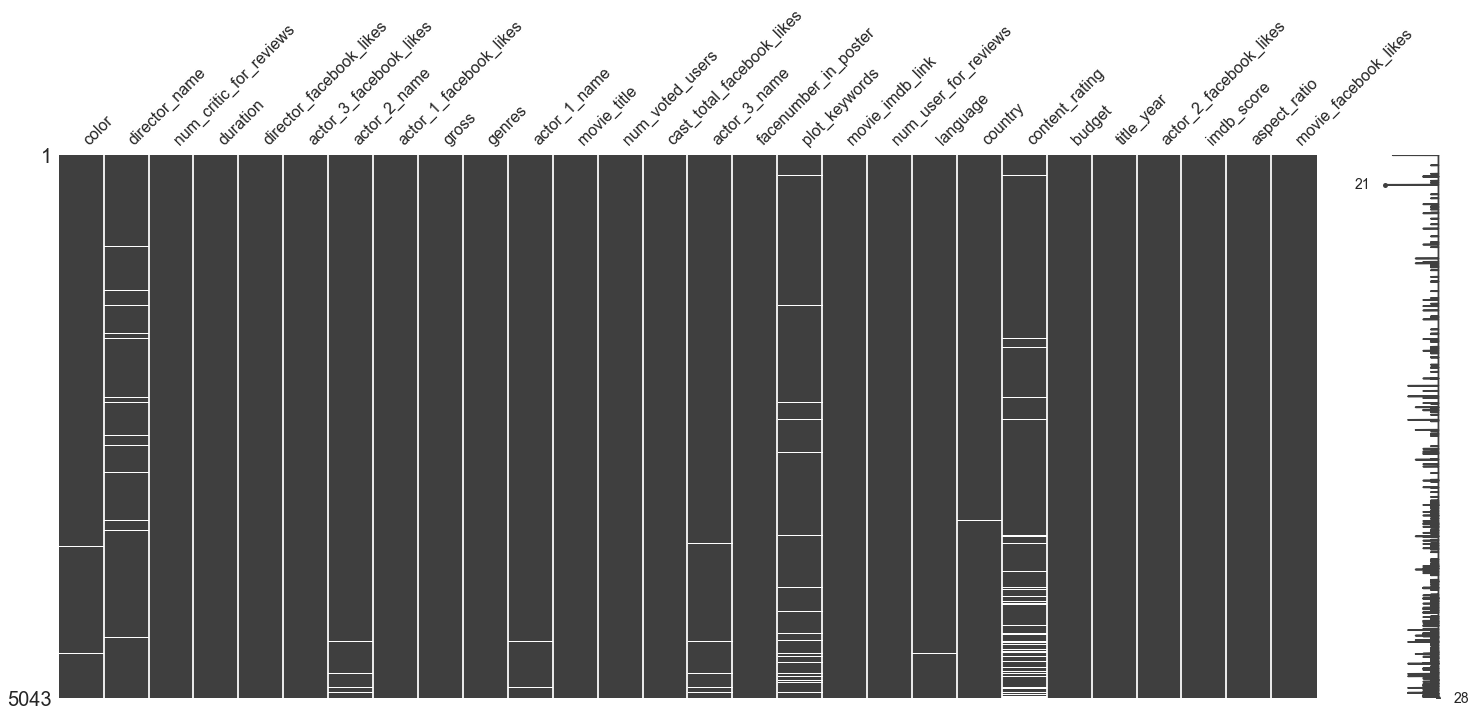

In [12]:
msno.matrix(movie_data)

### Drop Samples that have missing Categorical Data

In [13]:
movie_data.dropna(inplace=True)

### Dataset is Complete now

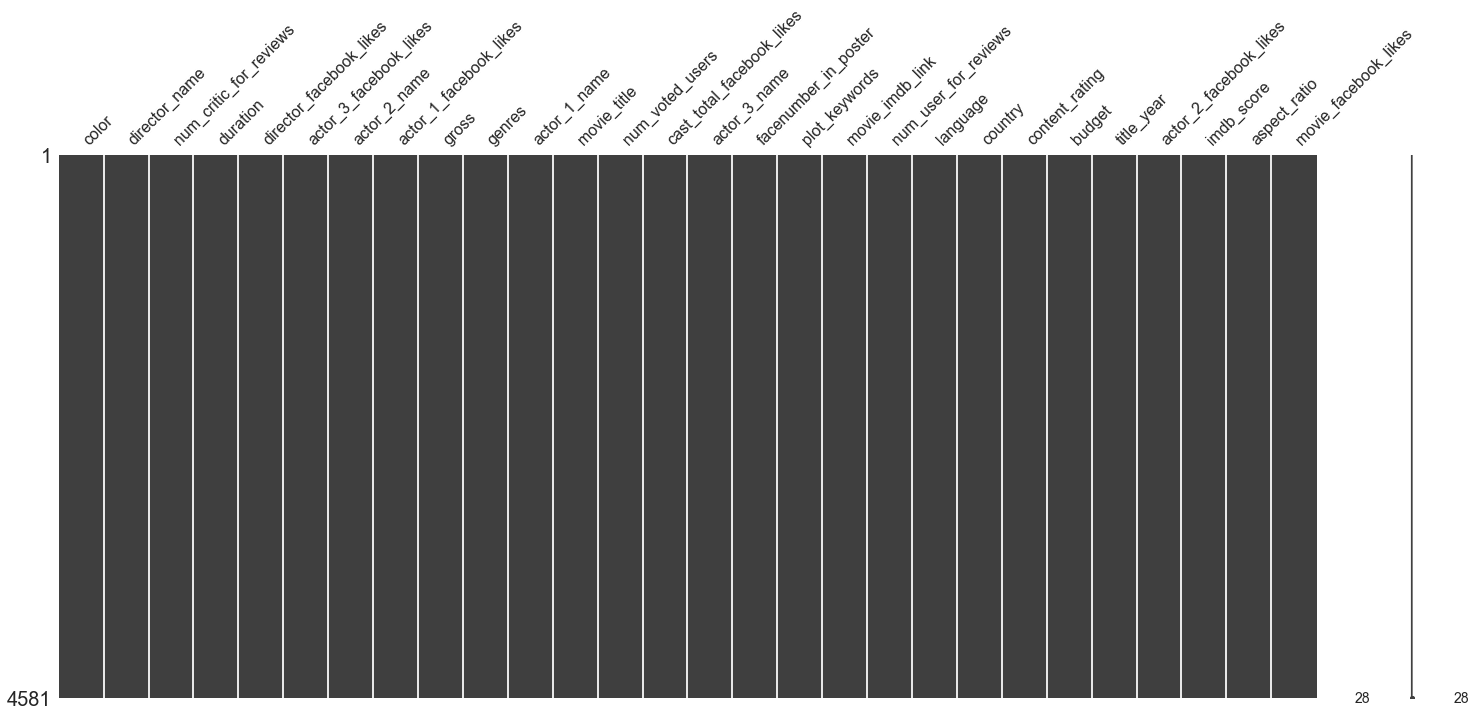

In [14]:
msno.matrix(movie_data)

### Distribution of Continues Features after Data Imputation

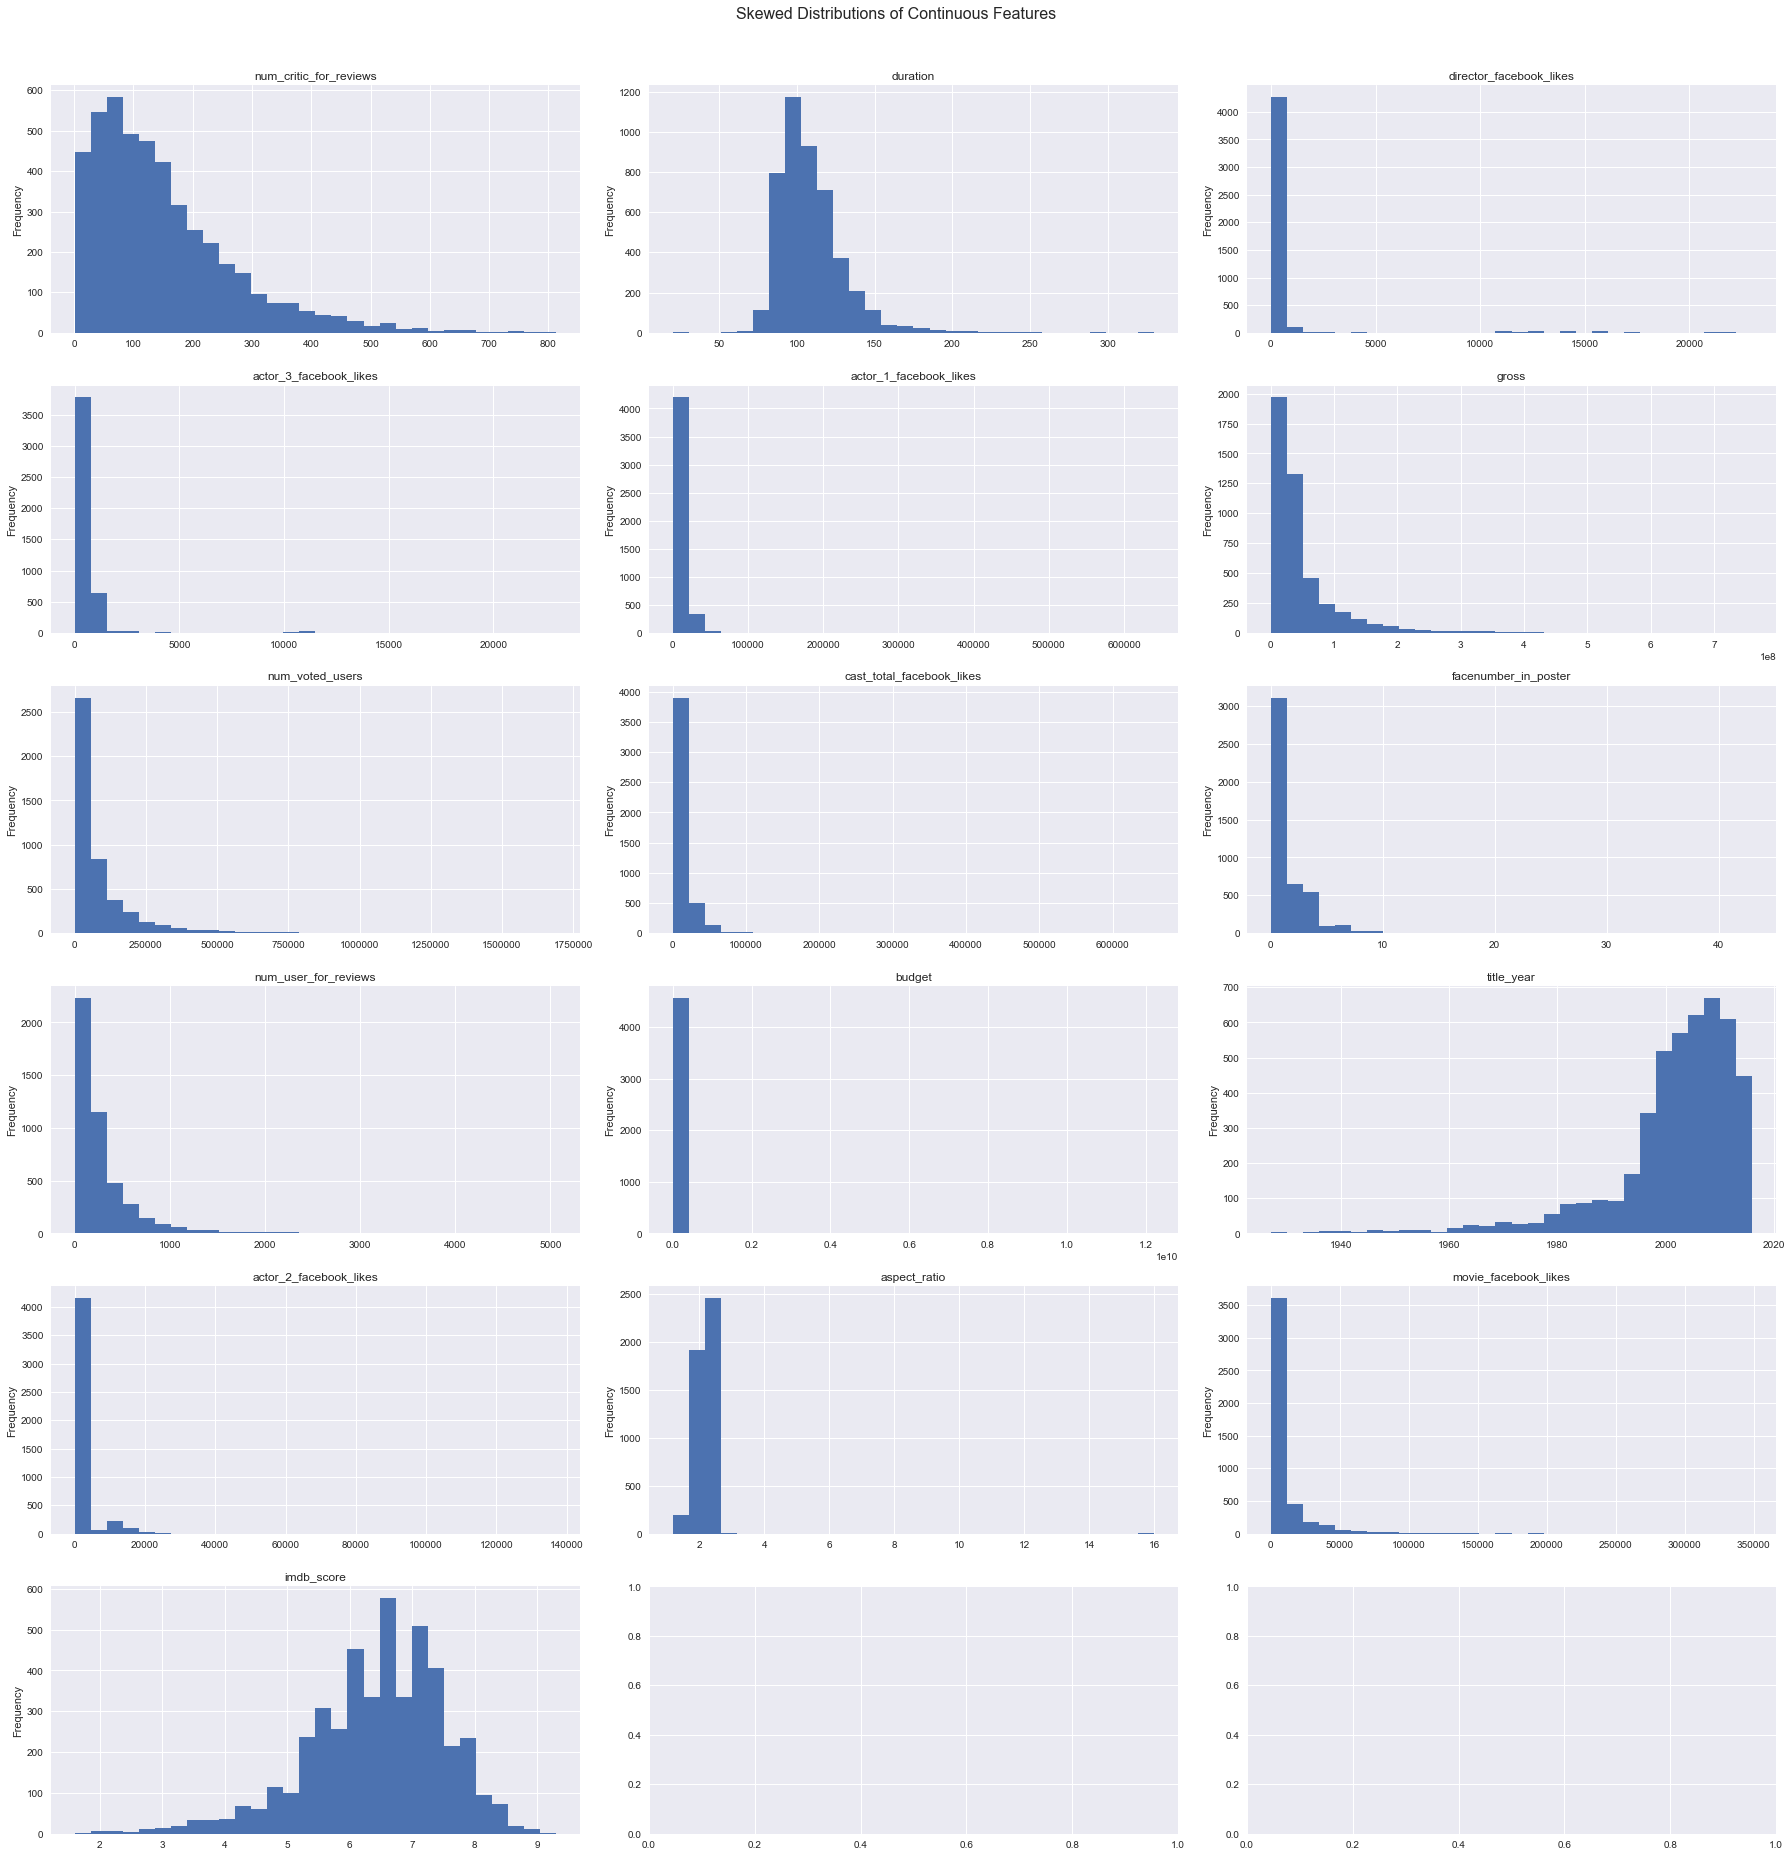

In [15]:
util.distribution(movie_data,'quant',transformed=False)

## Data Transformation

### Transforming Skewed Continuous Features

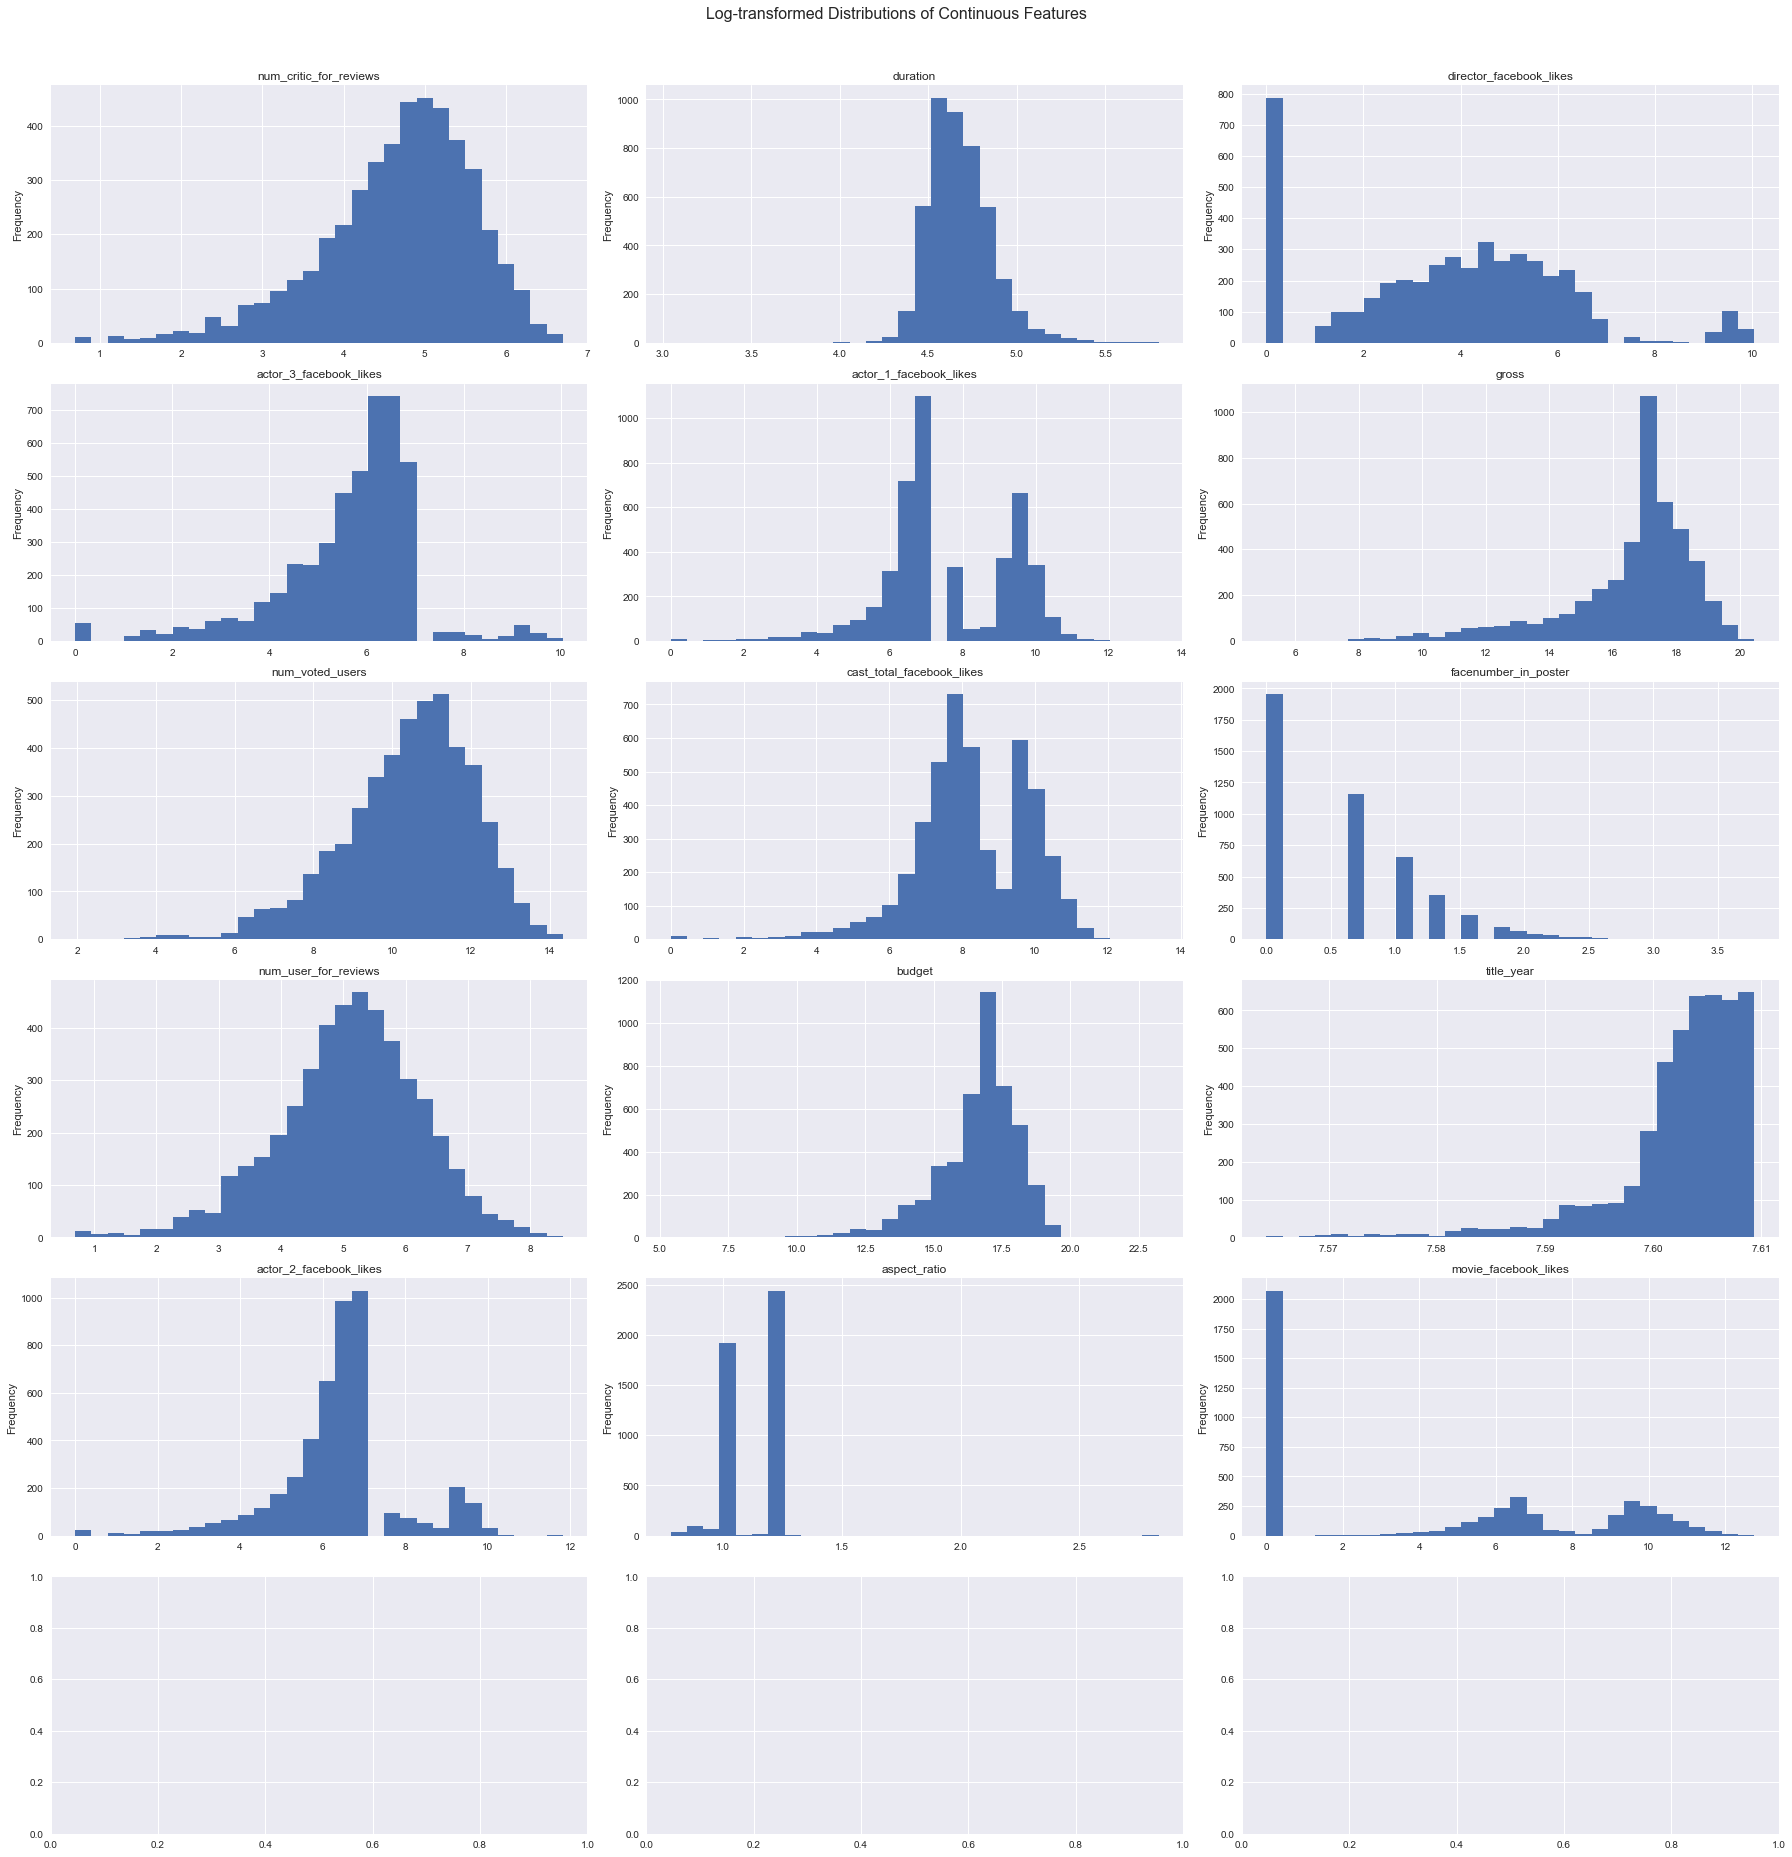

In [16]:
movie_data.dropna(inplace=True)
skewed = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'num_user_for_reviews',  'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes']
features_raw = movie_data.drop('imdb_score', axis = 1)
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
util.distribution(features_log_transformed,'quant',transformed = True)

## Data Encoding

### One Hot Encoding

In [17]:
features_final = pd.get_dummies(features_log_transformed)
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

24150 total features after one-hot encoding.


## Shuffle and Split Data

In [18]:
X_train, X_test, y_train, y_test = util.split_training_data(features_final,movie_data.imdb_score)

Training set has 3664 samples.
Testing set has 917 samples.


## Sample Data after Preprocessing

In [19]:
X_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1542,4.219508,4.605170,3.496508,6.257668,6.651572,18.211818,9.914427,7.978311,0.693147,4.615121,...,0,1,0,0,0,0,0,0,0,0
2944,5.993961,4.976734,5.556828,6.727432,8.699681,18.933547,13.061555,9.118883,0.693147,7.741534,...,0,0,1,0,0,0,0,0,0,0
2291,4.248495,4.624973,9.305741,1.098612,6.908755,16.089128,10.311749,7.387090,0.000000,4.948760,...,0,0,0,0,1,0,0,0,0,0
789,4.356709,4.465908,3.258097,5.583496,9.472782,17.162752,10.222596,9.610391,0.000000,4.317488,...,0,1,0,0,0,0,0,0,0,0
4564,2.944439,4.465908,4.890349,6.371612,6.658011,14.060226,7.874739,7.783641,1.098612,3.496508,...,0,0,0,0,1,0,0,0,0,0


## Feature Importance Analysis

### Top 15 Most Predictive Features

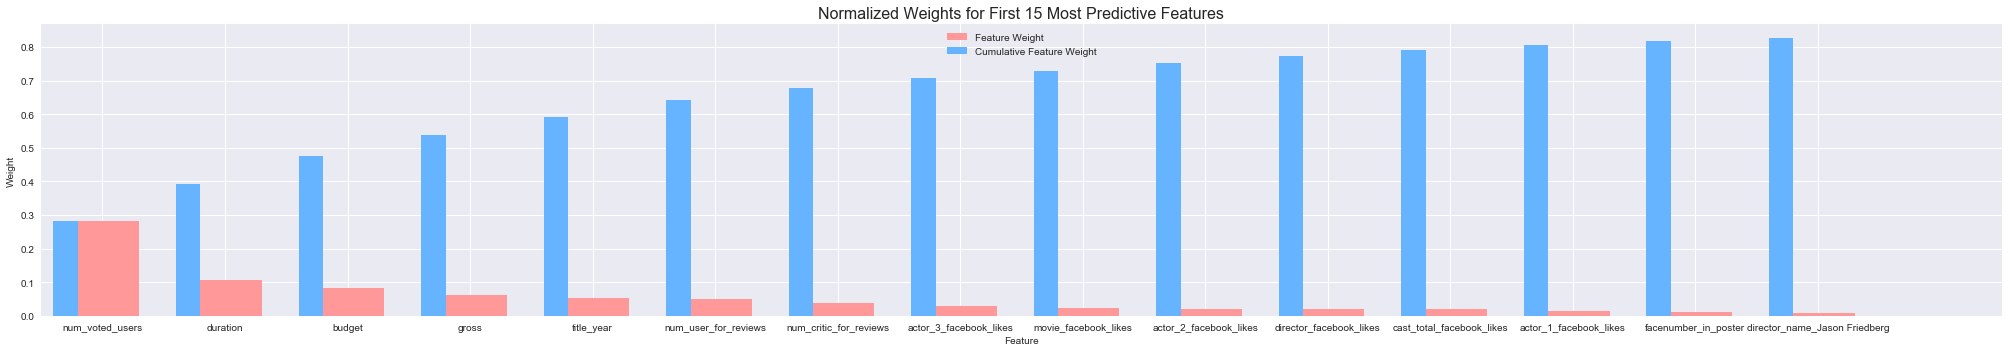

In [20]:
from sklearn import linear_model
from sklearn import ensemble
clf1=ensemble.RandomForestRegressor()
model = clf1.fit(X_train,y_train)
importances = model.feature_importances_
util.feature_plot(importances, X_train, y_train,15)

## Predictors

**From both Bivariate Analysis and Feature Importance Analysis picked up below features**
*  num_voted_users
*  duration
*  budget
*  gross
*  num_user_for_reviews
*  num_critic_for_reviews
*  title_year
*  actor_3_facebook_likes
*  director_facebook_likes
*  actor_2_facebook_likes
*  cast_total_facebook_likes
*  movie_facebook_likes
*  actor_1_facebook_likes
*  director_name
*  content_rating

**Note: Last 4 features can be ignored as they are not contributing much to predict the target.**

## Train the Model

In [21]:
predictors=['num_voted_users','duration','budget','gross','num_user_for_reviews','num_critic_for_reviews','title_year',
           'actor_3_facebook_likes','director_facebook_likes','actor_2_facebook_likes','cast_total_facebook_likes'
           ,'movie_facebook_likes','actor_1_facebook_likes','director_name','content_rating']
features_final = pd.get_dummies(features_log_transformed[predictors])
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
X_train, X_test, y_train, y_test = util.split_training_data(features_final,movie_data.imdb_score)

2142 total features after one-hot encoding.
Training set has 3664 samples.
Testing set has 917 samples.


## Model Evaluation

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor

classifiers=[LinearRegression(),Lasso(),RandomForestRegressor(random_state=96)]
for clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__)
    print('mean_squared_error ::: ',mean_squared_error(y_test, y_pred))
    print('r2_score ::: ',r2_score(y_test, y_pred))
    print('Current Params :::')
    print(clf.get_params())
    print('\n')

<class 'sklearn.linear_model.base.LinearRegression'>
mean_squared_error :::  2.2981697942091727e+20
r2_score :::  -1.931012795470323e+20
Current Params :::
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


<class 'sklearn.linear_model.coordinate_descent.Lasso'>
mean_squared_error :::  1.1937144985956802
r2_score :::  -0.0030059470518384312
Current Params :::
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


<class 'sklearn.ensemble.forest.RandomForestRegressor'>
mean_squared_error :::  0.5975766630316248
r2_score :::  0.4978925467142842
Current Params :::
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_

## Hyper Parameter Tuning

### Random Hyperparameter Grid

In [36]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

### Fit Model using Random Hyperparameter Grid

In [51]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 30)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=600, m

[Parallel(n_jobs=30)]: Done   3 out of  30 | elapsed:   15.7s remaining:  2.4min


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  12.6s
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  12.8s
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  28.2s
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  29.3s
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  29.8s
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 1.7min
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 1.7min
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth

[Parallel(n_jobs=30)]: Done  19 out of  30 | elapsed:  9.7min remaining:  5.6min


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 9.8min
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 9.8min
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=12.7min
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=12.7min
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=12.8min
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=14.0min
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=14.1min
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_de

[Parallel(n_jobs=30)]: Done  30 out of  30 | elapsed: 17.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=30,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

### Best Parameter Combination

In [52]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestRegressor(random_state = 96)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5436 degrees.
Accuracy = 90.05%.
Model Performance
Average Error: 0.5367 degrees.
Accuracy = 90.20%.
Improvement of 0.16%.


### Grid Search with Cross Validation

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 7, 9, 11],
    'n_estimators': [2000,2500,3000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 20, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2000 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2000 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2000 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2500 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2500 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2500 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3000 
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=3000 
[CV] bootstrap=True, max_depth=50, max_features=2

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   27.4s


[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=9, n_estimators=2500 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=2000, total=  26.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=9, n_estimators=2500 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=2000, total=  26.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=9, n_estimators=2500 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=2000, total=  26.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=9, n_estimators=3000 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=2000, total=  26.2s
[CV] bootstrap=True, max_depth=50, max_features=2, m

[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:  4.1min


[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=2500, total=  37.8s
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=2500, total=  37.6s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=11, n_estimators=3000 
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=11, n_estimators=3000 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=9, n_estimators=2000, total=  30.0s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=9, n_estimators=2000, total=  29.4s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_depth=50, max_features=3

[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed: 10.3min


[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=11, n_estimators=3000, total=  39.6s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=9, n_estimators=2500 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=2500, total=  33.6s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=9, n_estimators=2500 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=2000, total=  26.7s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=9, n_estimators=3000 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=2500, total=  33.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=9, n_estimators=3000 
[CV]  bootstrap=True, max_depth=60, max_features=3,

[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed: 18.7min


[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=7, n_estimators=3000 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=11, n_estimators=2500, total=  35.7s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=7, n_estimators=3000 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=2000, total=  29.0s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=9, n_estimators=2000 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=5, n_estimators=2000, total=  29.5s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=9, n_estimators=2000 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=11, n_estimators=3000, total=  42.8s
[CV]  bootstrap=True, max_depth=70, max_features=3

[Parallel(n_jobs=20)]: Done 648 out of 648 | elapsed: 19.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=20,
       param_grid={'bootstrap': [True], 'max_depth': [50, 60, 70], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [5, 7, 9, 11], 'n_estimators': [2000, 2500, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [59]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 2000}

### No Improvement in the result after GridSearch CV
- can be improved through the by increasing iteration and cross-validation

In [61]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.8374 degrees.
Accuracy = 84.87%.
Improvement of -5.76%.


## Model Performance Improvement
* Performance improvement after Hyper-Parameter Tuning

    * MSE got improved by 0.035
    * R2 got improved by 0.0301

In [71]:
y_pred_best_random=best_random.predict(X_test)
y_pred_base_model=base_model.predict(X_test)

best_mse=mean_squared_error(y_test, y_pred)
best_r2=r2_score(y_test, y_pred)

base_mse=mean_squared_error(y_test, y_pred_base_model)
base_r2=r2_score(y_test, y_pred_base_model)

print('::: Base Model Performance:::')
print('mean_squared_error ::: ',base_mse)
print('r2_score ::: ',base_r2)
print('\n')
print('::: Best Model Performance:::')
print('mean_squared_error ::: ',best_mse)
print('r2_score ::: ',best_r2)
print('\n')
print('Improvement after Hyper-Parameter Tuning')
print(' MSE ::: ',base_mse-best_mse)
print(' R2 ::: ',best_r2-base_r2)

::: Base Model Performance:::
mean_squared_error :::  0.5975766630316248
r2_score :::  0.4978925467142842


::: Best Model Performance:::
mean_squared_error :::  0.5617296489015496
r2_score :::  0.528012620147936


Improvement after Hyper-Parameter Tuning
 MSE :::  0.03584701413007518
 R2 :::  0.03012007343365186


## Conclusion

* Data Imputation Strategy can be employed on the Categorical Features with proper analysis to improve training data and models performance.
* As mentioned in Predictors section some of the predictors(less contributed) can be dropped off as they may add extra complexity instead of model improvement.
* Hyper Parameter Tuning can be improved by increasing the iterations and crossvalidation to find the best paraters and their values.